# Videoaula: Conhecendo as redes neurais

**Perceptron**

O que ele Faz?

> Calcula a soma ponderada das entradas (inputs).
> Multiplica pelos pesos (w).
> Representa a totalidade dos sinais de entrada.
> Aplica a função que determina sua saída (output).

Resumindo:

> Pesa evidências a partir de entradas com atributos a fim de tomar decisões.
> Algoritmo de aprendizado supervisionado de classificadores binários: decide se uma entrada, representada por um vetor de números, pertence ou não a uma classe específica.

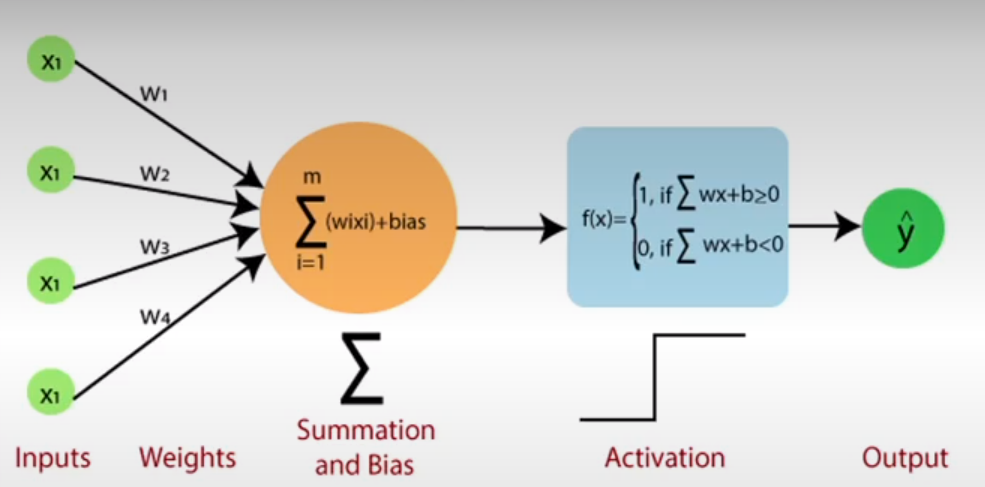

In [13]:
from IPython.display import Image
PATH = r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_I\Aula_IV\\"
Image(filename = PATH + "O Perceptron.png", width=100, height=100)

**O Perceptron**

Passo 1: sum(wi*xi) = x1*w1 + x2*w2 + x3*w3 + ...
Passo 2: y = f(sum(wi*xi) + bias)

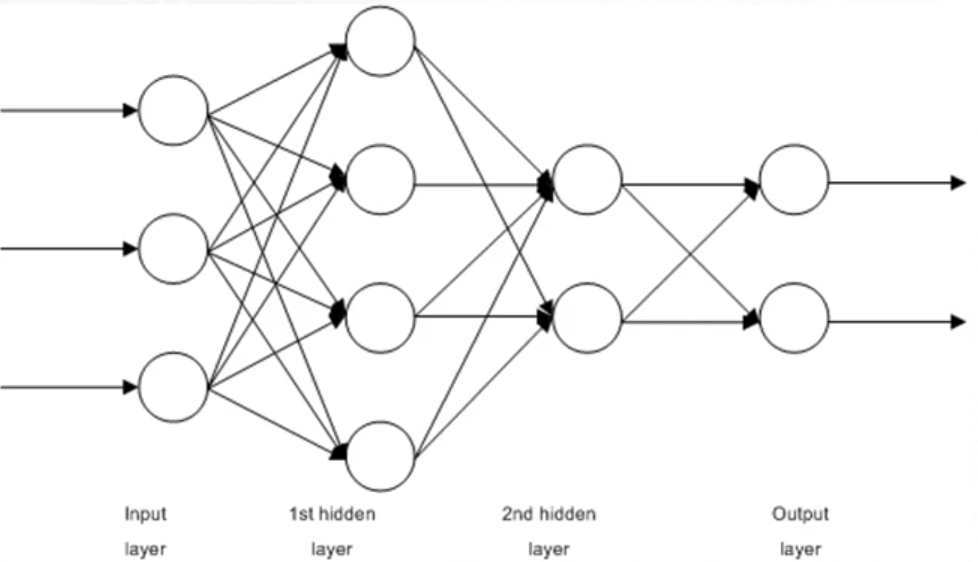

In [14]:
from IPython.display import Image

PATH = r"D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_I\Aula_IV\\"
Image(filename = PATH + "Perceptron Multicamadas.png", width=100, height=100)

**Perceptron Multicamadas**

O que ele faz:

> Pelo menos 3 camadas totalmente conectadas.
> O aprendizado ocorre alterando os pesos.
> Ele pode aprender com dados não linearmente separados.
> Ativação não-linear.

Resumindo:

> O Multilayer Perceptron (MLP) utiliza uma técnica de aprendizado supervisionado chamada retropropagação para o seu treinamento.
> Útis para cenários complexos, como reconhecimento de imagem, classificação de dados e tradução automática.

** Função de Ativação **

Qual é a função da Função de Ativação?

> Normalizar a entrada e produzir uma saída que é então transmitida para a camada subsequente.
> Elas decidem se um neurônio deve ser ativado ou não; Se a informação que o neurônio está recebendo é relevante para a informação fornecida ou deve ser ignorada.

y = Activation(sum(weights*inputs) + bias)

In [5]:
import numpy, random, os

lr = 1
bias = 1
weights = [random.random(), random.random(), random.random()]

In [6]:
def Perceptron(input1, input2, output):
    outputP = input1*weights[0] + input2*weights[1] + bias*weights[2]
    if outputP > 0: # Função de Ativação
        outputP = 1
    else:
        outputP = 0
    error = output - outputP
    weights[0] += error * input1 * lr
    weights[1] += error * input2 * lr
    weights[2] += error * bias * lr

In [7]:
for i in range (50) :
    Perceptron(1,1,1) #True or true 
    Perceptron(1,0,1) #True or false 
    Perceptron(0,1,1) #False or true 
    Perceptron(0,0,0) #False or false

In [8]:
x = int(input())
y = int(input())
outputP = x*weights[0] + y*weights[0] + bias*weights[2]
if outputP > 0: # Função de Ativação
    outputP = 1
else:
    outputP = 0
print(x, "or", y, "is: ", outputP)

5 or 10 is:  1


# Estudo de Caso
**Rede neural em 5 minutos**

In [15]:
import numpy as np

def nonlin(x, deriv=False): #função sigmoide
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [17]:
#Input data
X = np.array([  
                [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]
            ])

In [18]:
#Output data
y = np.array([
                [0],
                [1],
                [1],
                [0]
            ])

In [19]:
#Synapses
np.random.seed(1)

# Sinais de conexão entre as camadas
np.random.seed(1)
syn0 = 2*np.random.random((3,4)) - 1  # Conexões da camada de entrada (l0) para a camada oculta (l1)
syn1 = 2*np.random.random((4,1)) - 1  # Conexões da camada oculta (l1) para a camada de saída (l2)

# Treinamento
for j in range(60000):
    # Camada de entrada (l0)
    l0 = X

    # Camada oculta (l1)
    l1 = nonlin(np.dot(l0,syn0))  # Calcula a saída da camada oculta usando as conexões syn0

    # Camada de saída (l2)
    l2 = nonlin(np.dot(l1,syn1))  # Calcula a saída da camada de saída usando as conexões syn1

    # Erro da camada de saída
    l2_error = y - l2

    # Verifica o erro a cada 10.000 iterações
    if (j% 10000) == 0:
        print("Erro: " + str(np.mean(np.abs(l2_error))))

    # Cálculo do delta da camada de saída
    l2_delta = l2_error*nonlin(l2, deriv=True)

    # Cálculo do erro da camada oculta
    l1_error = l2_delta.dot(syn1.T)

    # Cálculo do delta da camada oculta
    l1_delta = l1_error * nonlin(l1, deriv=True)

    # Atualização das conexões syn1
    syn1 += l1.T.dot(l2_delta)

    # Atualização das conexões syn0
    syn0 += l0.T.dot(l1_delta)

# Saída após o treinamento
print("Saída após o treinamento:")
print(l2)

Erro: 0.4964100319027255
Erro: 0.008584525653247157
Erro: 0.005789459862507806
Erro: 0.004629176776769983
Erro: 0.0039587652802736475
Erro: 0.0035101225678616744
Saída após o treinamento:
[[0.00260572]
 [0.99672209]
 [0.99701711]
 [0.00386759]]
